In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMZN', 'ANET',
    'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'DDOG', 'DOCS', 'DOCU',
    'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED', 'GOOG', 'IDXX',
    'INTG', 'ISRG', 'JD', 'LSPD', 'LULU', 'MDB', 'MELI', 'MNST', 'MSFT',
    'MTCH', 'NVCR', 'NVDA', 'OKTA', 'OPEN', 'PAC', 'PANW', 'PAYC',
    'PINS', 'PYPL', 'QDEL', 'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU',
    'RVLV', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD',
    'TTWO', 'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'XPEV', 'ZEN',
    'ZM']
BEST_0 = [
    'AMRK', 'APT', 'EP', 'ESOA', 'GBOX', 'INTZ', 'MCVT','MICS', 'MTA',
    'PRPH']
BEST_1 = [
    'CUBE', 'EVR', 'EXR', 'LSI', 'NSA', 'PSA', 'REXR', 'TSLA','TWNK',
    'WCN']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

68

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2012-09-03', datetime.date(2022, 9, 3))

In [4]:
batch = sorted(SYMBOLS + BEST_0 + BEST_1) + INDICES # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  91 of 91 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADBE
   ...ADYEY
   ...AMD
   ...AMRK
   ...AMZN
   ...ANET
   ...APT
   ...ASML
   ...AXON
   ...BROS
   ...BYND
   ...CHWY
   ...CUBE
   ...DDOG
   ...DOCS
   ...DOCU
   ...DUOL
   ...EDIT
   ...EP
   ...ESOA
   ...ETSY
   ...EVR
   ...EXR
   ...FLGT
   ...GBOX
   ...GH
   ...GMED
   ...GOOG
   ...IDXX
   ...INTG
   ...INTZ
   ...ISRG
   ...JD
   ...LSI
   ...LSPD
   ...LULU
   ...MCVT
   ...MDB
   ...MELI
   ...MICS
   ...MNST
   ...MSFT
   ...MTA
   ...MTCH
   ...NSA
   ...NVCR
   ...NVDA
   ...OKTA
   ...OPEN
   ...PAC
   ...PANW
   ...PAYC
   ...PINS
   ...PRPH
   ...PSA
   ...PYPL
   ...QDEL
   ...RBLX
   ...RDFN
   ...REXR
   ...RGEN
   ...RIVN
   ...ROKU
   ...RVLV
   ...SE
   ...SHOP
   ...SNOW
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TSLA
   ...TTD
   ...TTWO
   ...TWLO
   ...TWNK
   ...TWTR
   ...TYL
   ...UPST
   ...VEEV
   ..

In [5]:
data['Date'].tail()

2512   2022-08-29
2513   2022-08-30
2514   2022-08-31
2515   2022-09-01
2516   2022-09-02
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       0.998932
2       1.020436
3       1.004050
4       0.993852
5       1.003135
          ...   
2512    0.993334
2513    0.988972
2514    0.992183
2515    1.002996
2516    0.989263
Name: ^GSPC, Length: 2516, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.000000
2,1.028382
3,1.009668
4,1.000603
5,1.003564
...,...
2512,0.996432
2513,1.001187
2514,1.002534
2515,1.002475


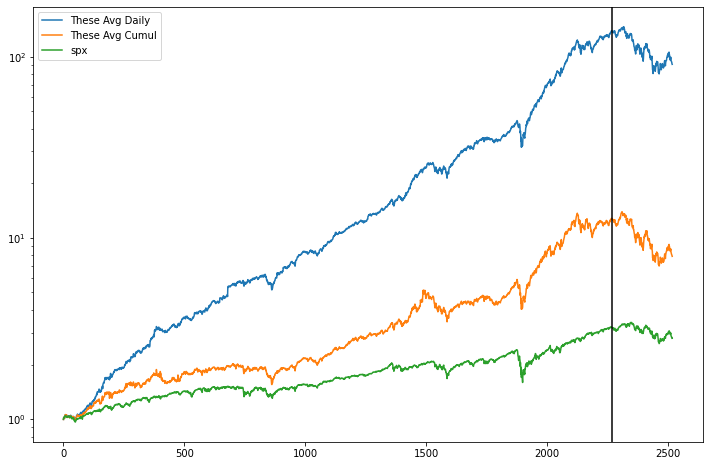

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2012-09-04,NaN,NaN
1,2012-09-05,0.995226,0.995226
2,2012-09-06,1.018701,1.018760
3,2012-09-07,1.024617,1.025017
4,2012-09-10,1.019051,1.019168


In [10]:
out.tail()

,Date,mine1,mine2
2512,2022-08-29,94.665240,8.233194
2513,2022-08-30,93.936397,8.145879
2514,2022-08-31,93.554029,8.082438
2515,2022-09-01,91.646250,8.009244
2516,2022-09-02,90.829326,7.913460


In [11]:
!ls ../data

all_symbols.pkl             nasdaq_sharpes_by_state.csv
dev_quantiles.csv           nya1965.csv
historic.csv                pct_params
hmm_exp_returns.csv         scoring.csv
mine.csv                    sharpes_by_state.csv
myHistoric.RData            sp1950.csv
myHistoricTest.RData        wilshire1990.csv
nasdaq1965.csv


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

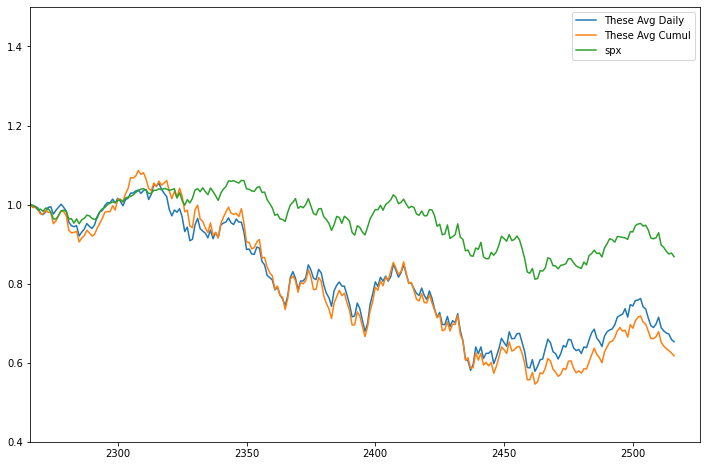

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.4, 1.5)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=40):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
2477,72.709999,72.709999,76.000000,71.500000,75.989998,4.286479,0.956836,0.937952,0.980263
2478,72.510002,72.510002,74.110001,70.238998,72.769997,4.283725,0.996427,0.997249,1.000825
2479,71.110001,71.110001,73.254997,68.519997,68.949997,4.264228,1.031327,0.980692,0.950903
2480,67.779999,67.779999,70.089996,67.260002,69.970001,4.216267,0.968701,0.953171,0.983969
2481,69.150002,69.150002,69.330002,66.519997,68.800003,4.236278,1.005087,1.020212,1.015049


In [16]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
2477,72.709999,72.709999,76.000000,71.500000
2478,72.510002,72.510002,74.110001,70.238998
2479,71.110001,71.110001,73.254997,68.519997
2480,67.779999,67.779999,70.089996,67.260002
2481,69.150002,69.150002,69.330002,66.519997


In [17]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
2477,72.709999,72.709999,76.000000,71.500000,74.110001,70.238998,1.019255,0.966016
2478,72.510002,72.510002,74.110001,70.238998,73.254997,68.519997,1.010274,0.944973
2479,71.110001,71.110001,73.254997,68.519997,70.089996,67.260002,0.985656,0.945859
2480,67.779999,67.779999,70.089996,67.260002,69.330002,66.519997,1.022868,0.981410
2481,69.150002,69.150002,69.330002,66.519997,72.699997,68.870003,1.051338,0.995951


0.05    0.978103
Name: HighMult, dtype: float64


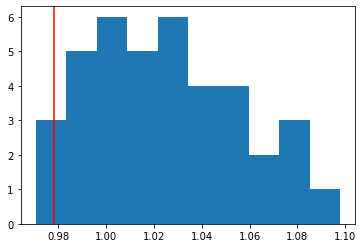

In [18]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.015697371611524


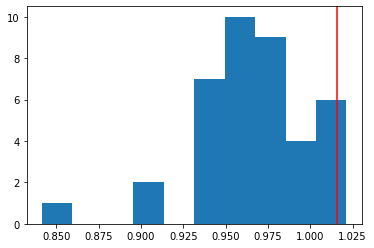

In [19]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [20]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [21]:
get_hilo_mult(rblx)

(1.015697371611524, 0.9781029416744824)

In [22]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0060613400209928, 0.9974411520442146)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
2477,72.709999,72.709999,76.000000,71.500000,74.110001,70.238998,1.019255,0.966016,0
2478,72.510002,72.510002,74.110001,70.238998,73.254997,68.519997,1.010274,0.944973,0
2479,71.110001,71.110001,73.254997,68.519997,70.089996,67.260002,0.985656,0.945859,0
2480,67.779999,67.779999,70.089996,67.260002,69.330002,66.519997,1.022868,0.981410,0
2481,69.150002,69.150002,69.330002,66.519997,72.699997,68.870003,1.051338,0.995951,0


In [25]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [26]:
get_hilo_mults(rblx)

(1.012017586398899, 0.9836001347374321, 1.0162802549414012, 0.9783120226020972)

In [27]:
get_hilo_mults(aapl)

(1.008703320114399, 0.9989435328711656, 1.0036164399969394, 0.9989814941042418)

In [28]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008703,0.998944,1.003616,0.998981
1,ABMD,1.001996,0.995638,1.008417,0.993068
2,ABNB,1.018150,0.987796,1.010346,1.003238
3,ADBE,1.005738,0.990159,1.010554,0.993664
4,ADYEY,1.031267,0.970926,1.031297,0.954860


In [29]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,155.809998,AAPL
ABMD,261.23999,ABMD
ABNB,113.639999,ABNB
ADBE,368.140015,ADBE
ADYEY,14.675,ADYEY
...,...,...
ZEN,76.769997,ZEN
ZM,80.790001,ZM
^GSPC,3924.26001,^GSPC
^IXIC,11630.860352,^IXIC


In [30]:
df = df.merge(price, how='left', on='stock')
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down,price
0,AAPL,1.008703,0.998944,1.003616,0.998981,155.809998
1,ABMD,1.001996,0.995638,1.008417,0.993068,261.23999
2,ABNB,1.018150,0.987796,1.010346,1.003238,113.639999
3,ADBE,1.005738,0.990159,1.010554,0.993664,368.140015
4,ADYEY,1.031267,0.970926,1.031297,0.954860,14.675


In [31]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv